## Exercise 4-1
Milan Sherman

In [15]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Read the pregnancy data and create the live birth and firsts dataframes (as I am a first baby)

In [16]:
preg_df = nsfg.ReadFemPreg()
live = preg_df[preg_df.outcome == 1]
firsts = live[live.birthord == 1]

Calculate my weight as a decimal (7 lbs, 13 oz.)

In [17]:
my_weight = 7 + 13/16
print(my_weight)

7.8125


Create the PercentileRank function and use it to find my percentile rank among all births and among first babies

In [18]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [19]:
overall_rank = PercentileRank(live.totalwgt_lb, my_weight)
print('overall rank ' + str(overall_rank))
first_rank = PercentileRank(firsts.totalwgt_lb, my_weight)
print('firsts rank ' + str(first_rank))

overall rank 66.33143856580674
firsts rank 69.09132109675957


My percentile rank is slightly higher among first born babies, which is consistent with what we've found regarding the distribution of first babies' weight being slightly lower than other babies

Create the Percentile function, and use it to determine the 90th percentile weight in each group (overall and first)

In [20]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [21]:
overall_wgt_list = live.totalwgt_lb.tolist()
overall_percentile = Percentile2(overall_wgt_list, 90)
print(overall_percentile)
first_wgt_list = firsts.totalwgt_lb.tolist()
firsts_percentile = Percentile2(first_wgt_list, 90)
print(firsts_percentile)

8.0
6.5


8 lbs in the 90th percentile overall, but 6.5 lbs is the 90th percentile for first babies.  Looks like I need to call my Mom and thank her.

## Exercise 4-2

Generate 1000 random numbers from a uniform distribution, create a pmf from it, and plot the pmf

In [22]:
sample = np.random.random_sample((1000,))
sample_pmf = thinkstats2.Pmf(sample)

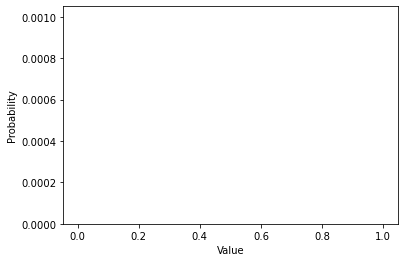

In [23]:
thinkplot.Hist(sample_pmf)
thinkplot.Config(xlabel = 'Value',
                 ylabel = 'Probability')

My hypothesis is that due to the accuracy of values in the pmf, the probability of any single value is very close to 0, i.e., it is highly unlikely to get more than one of same value in the random sample

Now I create the cdf from the sample and plot it

In [24]:
cdf = thinkstats2.Cdf(sample)
ranks = [cdf.PercentileRank(x) for x in sample]

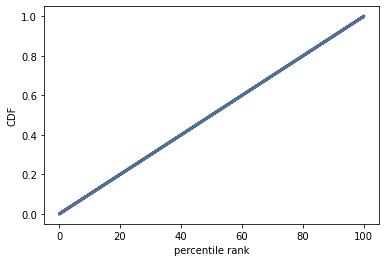

<Figure size 576x432 with 0 Axes>

In [25]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

This looks very uniform as indicated by the very straight diagonal line